# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

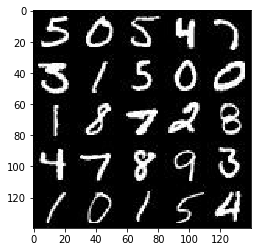

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

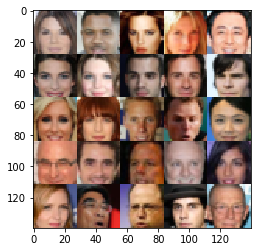

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    input_z = tf.placeholder(tf.float32, shape=[None, z_dim], name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.01
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # input layer is 28x28x3
        x1 = tf.layers.conv2d(inputs=images, filters=64, kernel_size=5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1) # leaky relu
        print ('X1:', relu1.shape)
        # 14x14x64
        
        x2 = tf.layers.conv2d(inputs=relu1, filters=128, kernel_size=5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        print ('X2:', relu2.shape)
        # 7x7x128
        
        x3 = tf.layers.conv2d(inputs=relu2, filters=256, kernel_size=5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        print ('X3:', relu3.shape)
        # 4x4x256
        
        ## Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        print ('Output:', logits.shape)
        output = tf.sigmoid(logits)
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

X1: (?, 14, 14, 64)
X2: (?, 7, 7, 128)
X3: (?, 4, 4, 256)
Output: (?, 1)
X1: (?, 14, 14, 64)
X2: (?, 7, 7, 128)
X3: (?, 4, 4, 256)
Output: (?, 1)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('generator', reuse=not(is_train)):
        # First fully connected layer
        ####### REVIEWER SUGGESTION START #######
        """
         I would suggest adding at least one more convolution transpose layer. 
         This will ensure that the generator is bigger than the discriminator. 
         It has been found in recent research that using a generator bigger 
         than the discriminator tends to produce better samples. 
         In order to do this, you could start from a larger dense layer e.g. (7 x 7 x 512)
         """"
        x0 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x0 = tf.reshape(x0, (-1, 7, 7, 512))
        x0 = tf.layers.batch_normalization(x0, training=is_train)
        x0 = tf.maximum(alpha*x0, x0)
        print ('X0:', x0.shape)
        ####### REVIEWER RECOMMENDATION END #######
        # 7x7x512
        
        x1 = tf.layers.conv2d_transpose(x0, 256, 5, strides=2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        print('X1:', x1.shape)
        # 14x14x256
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        print('X2:', x2.shape)
        # 28x28x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        print('X3:', x3.shape)
        # 28x28x64
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        print('Output:', logits.shape)
        out = tf.tanh(logits)
        # 28x28x5
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 5)
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 4)
X1: (?, 14, 14, 64)
X2: (?, 7, 7, 128)
X3: (?, 4, 4, 256)
Output: (?, 1)
X1: (?, 14, 14, 64)
X2: (?, 7, 7, 128)
X3: (?, 4, 4, 256)
Output: (?, 1)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_depth = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_depth, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_depth)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()
    losses = []
    steps=0
    print_every=10
    show_every=100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model

                ########## REVIEWER RECOMMENDATION START ##########
                """
                The output from the generator is bound between -1 and 1 
                as we use tanh as the activation function in the output layer. 
                The input batch images are in the range -0.5 to 0.5. 
                You must scale the input images to match the values as in generated image
                """
                batch_images = batch_images * 2 
                ########## REVIEWER RECOMMENDATION END ##########
                
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval(feed_dict={input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                    
                    if steps % show_every == 0:
                        show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)
                        
        saver.save(sess, './generator.ckpt')
    return losses
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)
X1: (?, 14, 14, 64)
X2: (?, 7, 7, 128)
X3: (?, 4, 4, 256)
Output: (?, 1)
X1: (?, 14, 14, 64)
X2: (?, 7, 7, 128)
X3: (?, 4, 4, 256)
Output: (?, 1)
Epoch 1/2... Discriminator Loss: 0.0069... Generator Loss: 9.6587
Epoch 1/2... Discriminator Loss: 3.9772... Generator Loss: 0.0670
Epoch 1/2... Discriminator Loss: 0.4126... Generator Loss: 2.0314
Epoch 1/2... Discriminator Loss: 0.3967... Generator Loss: 2.1970
Epoch 1/2... Discriminator Loss: 0.1212... Generator Loss: 3.5527
Epoch 1/2... Discriminator Loss: 1.3513... Generator Loss: 0.4448
Epoch 1/2... Discriminator Loss: 0.8694... Generator Loss: 1.0314
Epoch 1/2... Discriminator Loss: 1.9042... Generator Loss: 0.3923
Epoch 1/2... Discriminator Loss: 1.4944... Generator Loss: 0.4969
Epoch 1/2... Discriminator Loss: 1.6724... Generator Loss: 0.4636
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (

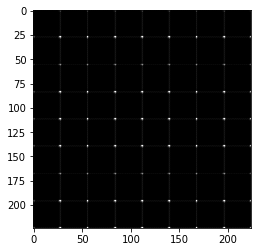

Epoch 1/2... Discriminator Loss: 1.1999... Generator Loss: 0.9307
Epoch 1/2... Discriminator Loss: 1.3310... Generator Loss: 1.1108
Epoch 1/2... Discriminator Loss: 1.2380... Generator Loss: 0.7561
Epoch 1/2... Discriminator Loss: 1.3237... Generator Loss: 0.6753
Epoch 1/2... Discriminator Loss: 1.1896... Generator Loss: 0.6315
Epoch 1/2... Discriminator Loss: 1.1848... Generator Loss: 0.6101
Epoch 1/2... Discriminator Loss: 1.2930... Generator Loss: 1.3455
Epoch 1/2... Discriminator Loss: 1.2075... Generator Loss: 0.6521
Epoch 1/2... Discriminator Loss: 1.3131... Generator Loss: 1.1501
Epoch 1/2... Discriminator Loss: 1.3579... Generator Loss: 0.4908
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


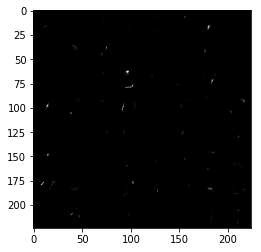

Epoch 1/2... Discriminator Loss: 1.2967... Generator Loss: 0.5335
Epoch 1/2... Discriminator Loss: 1.2839... Generator Loss: 0.5729
Epoch 1/2... Discriminator Loss: 1.2963... Generator Loss: 0.9637
Epoch 1/2... Discriminator Loss: 1.3593... Generator Loss: 0.8664
Epoch 1/2... Discriminator Loss: 1.2635... Generator Loss: 0.6578
Epoch 1/2... Discriminator Loss: 1.2887... Generator Loss: 0.8582
Epoch 1/2... Discriminator Loss: 1.2042... Generator Loss: 0.7729
Epoch 1/2... Discriminator Loss: 1.2430... Generator Loss: 0.8718
Epoch 1/2... Discriminator Loss: 1.1677... Generator Loss: 0.6298
Epoch 1/2... Discriminator Loss: 1.2759... Generator Loss: 0.8479
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


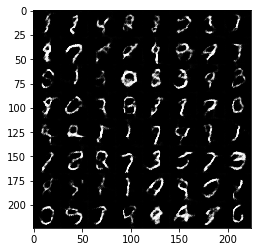

Epoch 1/2... Discriminator Loss: 1.3263... Generator Loss: 0.4676
Epoch 1/2... Discriminator Loss: 1.3171... Generator Loss: 0.5830
Epoch 1/2... Discriminator Loss: 1.3272... Generator Loss: 0.4662
Epoch 1/2... Discriminator Loss: 1.2571... Generator Loss: 0.6991
Epoch 1/2... Discriminator Loss: 1.1007... Generator Loss: 0.9257
Epoch 1/2... Discriminator Loss: 1.3605... Generator Loss: 0.5313
Epoch 1/2... Discriminator Loss: 1.3565... Generator Loss: 1.1784
Epoch 1/2... Discriminator Loss: 1.2658... Generator Loss: 0.7119
Epoch 1/2... Discriminator Loss: 1.3003... Generator Loss: 0.8888
Epoch 1/2... Discriminator Loss: 1.7823... Generator Loss: 0.2530
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


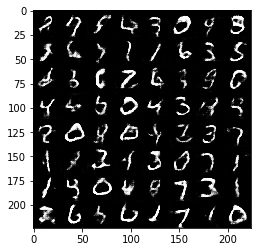

Epoch 1/2... Discriminator Loss: 1.3905... Generator Loss: 0.4211
Epoch 1/2... Discriminator Loss: 1.5047... Generator Loss: 0.4381
Epoch 1/2... Discriminator Loss: 1.0681... Generator Loss: 0.6981
Epoch 1/2... Discriminator Loss: 1.2111... Generator Loss: 0.6132
Epoch 1/2... Discriminator Loss: 1.2744... Generator Loss: 0.7348
Epoch 1/2... Discriminator Loss: 1.2409... Generator Loss: 1.2031
Epoch 1/2... Discriminator Loss: 1.3105... Generator Loss: 0.5849
Epoch 1/2... Discriminator Loss: 1.2030... Generator Loss: 0.9048
Epoch 1/2... Discriminator Loss: 1.2594... Generator Loss: 0.5722
Epoch 1/2... Discriminator Loss: 1.8172... Generator Loss: 0.2377
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


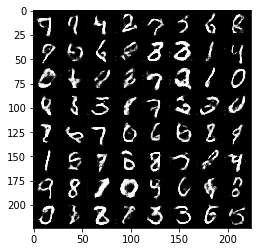

Epoch 1/2... Discriminator Loss: 1.3399... Generator Loss: 0.5129
Epoch 1/2... Discriminator Loss: 1.2184... Generator Loss: 0.9198
Epoch 1/2... Discriminator Loss: 1.2685... Generator Loss: 0.5108
Epoch 1/2... Discriminator Loss: 1.2276... Generator Loss: 0.7899
Epoch 1/2... Discriminator Loss: 1.3295... Generator Loss: 0.4497
Epoch 1/2... Discriminator Loss: 1.4438... Generator Loss: 1.4808
Epoch 1/2... Discriminator Loss: 1.1781... Generator Loss: 0.6235
Epoch 1/2... Discriminator Loss: 1.3565... Generator Loss: 0.5225
Epoch 1/2... Discriminator Loss: 1.2739... Generator Loss: 0.7438
Epoch 1/2... Discriminator Loss: 1.1275... Generator Loss: 0.6393
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


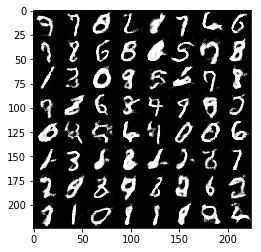

Epoch 1/2... Discriminator Loss: 1.1950... Generator Loss: 1.0259
Epoch 1/2... Discriminator Loss: 1.4299... Generator Loss: 0.4468
Epoch 1/2... Discriminator Loss: 1.4588... Generator Loss: 1.5607
Epoch 1/2... Discriminator Loss: 1.1367... Generator Loss: 0.8114
Epoch 1/2... Discriminator Loss: 1.2198... Generator Loss: 0.8344
Epoch 1/2... Discriminator Loss: 1.2147... Generator Loss: 0.6594
Epoch 1/2... Discriminator Loss: 1.9441... Generator Loss: 2.1890
Epoch 1/2... Discriminator Loss: 1.1655... Generator Loss: 0.8057
Epoch 1/2... Discriminator Loss: 1.2189... Generator Loss: 0.9483
Epoch 1/2... Discriminator Loss: 1.2889... Generator Loss: 0.8087
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


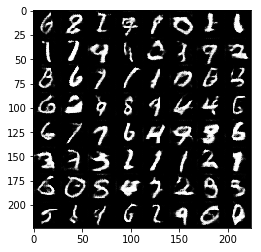

Epoch 1/2... Discriminator Loss: 1.0785... Generator Loss: 1.1707
Epoch 1/2... Discriminator Loss: 1.1748... Generator Loss: 1.2257
Epoch 1/2... Discriminator Loss: 1.0502... Generator Loss: 0.8009
Epoch 1/2... Discriminator Loss: 1.4272... Generator Loss: 0.4652
Epoch 1/2... Discriminator Loss: 1.1859... Generator Loss: 0.9960
Epoch 1/2... Discriminator Loss: 1.0557... Generator Loss: 0.9444
Epoch 1/2... Discriminator Loss: 1.2975... Generator Loss: 0.6837
Epoch 1/2... Discriminator Loss: 1.3155... Generator Loss: 0.5081
Epoch 1/2... Discriminator Loss: 1.1319... Generator Loss: 1.1403
Epoch 1/2... Discriminator Loss: 1.2666... Generator Loss: 0.6159
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


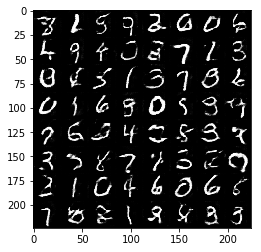

Epoch 1/2... Discriminator Loss: 1.1505... Generator Loss: 0.7865
Epoch 1/2... Discriminator Loss: 0.9399... Generator Loss: 1.0067
Epoch 1/2... Discriminator Loss: 1.2313... Generator Loss: 0.9497
Epoch 1/2... Discriminator Loss: 1.2272... Generator Loss: 0.9008
Epoch 1/2... Discriminator Loss: 1.1507... Generator Loss: 0.7487
Epoch 1/2... Discriminator Loss: 1.2412... Generator Loss: 0.7572
Epoch 1/2... Discriminator Loss: 1.3910... Generator Loss: 1.5693
Epoch 1/2... Discriminator Loss: 1.3099... Generator Loss: 0.5400
Epoch 1/2... Discriminator Loss: 1.0576... Generator Loss: 1.0095
Epoch 1/2... Discriminator Loss: 1.2052... Generator Loss: 0.5300
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


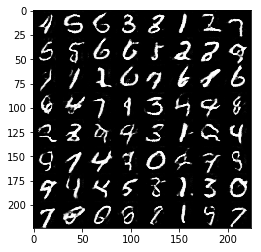

Epoch 1/2... Discriminator Loss: 1.0850... Generator Loss: 0.7939
Epoch 1/2... Discriminator Loss: 1.3684... Generator Loss: 0.4582
Epoch 1/2... Discriminator Loss: 1.0424... Generator Loss: 0.7358
Epoch 2/2... Discriminator Loss: 1.7900... Generator Loss: 1.9490
Epoch 2/2... Discriminator Loss: 1.2265... Generator Loss: 0.6443
Epoch 2/2... Discriminator Loss: 1.1241... Generator Loss: 0.7333
Epoch 2/2... Discriminator Loss: 1.1055... Generator Loss: 0.7336
Epoch 2/2... Discriminator Loss: 1.2258... Generator Loss: 0.6248
Epoch 2/2... Discriminator Loss: 0.9789... Generator Loss: 0.9148
Epoch 2/2... Discriminator Loss: 1.0243... Generator Loss: 0.9632
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


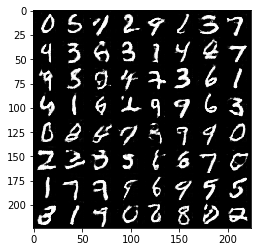

Epoch 2/2... Discriminator Loss: 0.9437... Generator Loss: 0.9620
Epoch 2/2... Discriminator Loss: 1.1313... Generator Loss: 0.8089
Epoch 2/2... Discriminator Loss: 1.3473... Generator Loss: 0.4196
Epoch 2/2... Discriminator Loss: 1.2689... Generator Loss: 1.2264
Epoch 2/2... Discriminator Loss: 1.2776... Generator Loss: 0.5066
Epoch 2/2... Discriminator Loss: 1.1710... Generator Loss: 0.5355
Epoch 2/2... Discriminator Loss: 1.2465... Generator Loss: 0.7252
Epoch 2/2... Discriminator Loss: 1.0829... Generator Loss: 0.7394
Epoch 2/2... Discriminator Loss: 1.3178... Generator Loss: 0.4930
Epoch 2/2... Discriminator Loss: 0.9960... Generator Loss: 0.9221
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


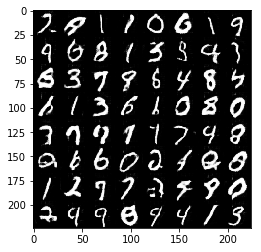

Epoch 2/2... Discriminator Loss: 1.0264... Generator Loss: 0.9102
Epoch 2/2... Discriminator Loss: 1.0131... Generator Loss: 0.9138
Epoch 2/2... Discriminator Loss: 1.4714... Generator Loss: 0.3333
Epoch 2/2... Discriminator Loss: 1.2158... Generator Loss: 0.8314
Epoch 2/2... Discriminator Loss: 1.3058... Generator Loss: 0.4961
Epoch 2/2... Discriminator Loss: 1.0897... Generator Loss: 0.6021
Epoch 2/2... Discriminator Loss: 1.0493... Generator Loss: 0.6069
Epoch 2/2... Discriminator Loss: 1.4055... Generator Loss: 0.4870
Epoch 2/2... Discriminator Loss: 1.1248... Generator Loss: 0.6826
Epoch 2/2... Discriminator Loss: 3.1362... Generator Loss: 4.1584
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


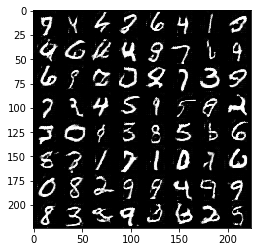

Epoch 2/2... Discriminator Loss: 1.2055... Generator Loss: 0.7390
Epoch 2/2... Discriminator Loss: 1.1789... Generator Loss: 0.6139
Epoch 2/2... Discriminator Loss: 1.0459... Generator Loss: 0.7530
Epoch 2/2... Discriminator Loss: 1.2264... Generator Loss: 0.5770
Epoch 2/2... Discriminator Loss: 1.0579... Generator Loss: 1.0011
Epoch 2/2... Discriminator Loss: 1.0749... Generator Loss: 1.1687
Epoch 2/2... Discriminator Loss: 1.1576... Generator Loss: 0.6933
Epoch 2/2... Discriminator Loss: 1.1531... Generator Loss: 0.5961
Epoch 2/2... Discriminator Loss: 1.1727... Generator Loss: 0.8675
Epoch 2/2... Discriminator Loss: 0.9507... Generator Loss: 1.0052
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


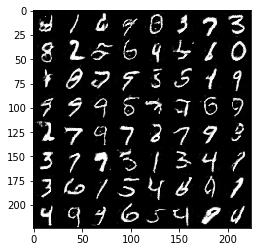

Epoch 2/2... Discriminator Loss: 1.4961... Generator Loss: 0.3698
Epoch 2/2... Discriminator Loss: 0.8414... Generator Loss: 1.2820
Epoch 2/2... Discriminator Loss: 1.0755... Generator Loss: 1.5996
Epoch 2/2... Discriminator Loss: 1.1281... Generator Loss: 0.7951
Epoch 2/2... Discriminator Loss: 1.0005... Generator Loss: 1.0127
Epoch 2/2... Discriminator Loss: 1.7365... Generator Loss: 1.8168
Epoch 2/2... Discriminator Loss: 1.1616... Generator Loss: 0.7301
Epoch 2/2... Discriminator Loss: 1.0603... Generator Loss: 0.7695
Epoch 2/2... Discriminator Loss: 1.2079... Generator Loss: 0.8218
Epoch 2/2... Discriminator Loss: 1.1082... Generator Loss: 0.6551
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


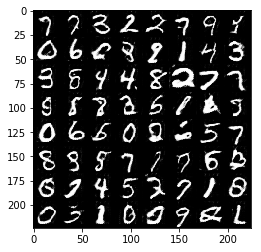

Epoch 2/2... Discriminator Loss: 1.1909... Generator Loss: 0.8991
Epoch 2/2... Discriminator Loss: 1.5369... Generator Loss: 0.3443
Epoch 2/2... Discriminator Loss: 1.5858... Generator Loss: 1.6881
Epoch 2/2... Discriminator Loss: 1.1422... Generator Loss: 0.7986
Epoch 2/2... Discriminator Loss: 1.0956... Generator Loss: 0.8244
Epoch 2/2... Discriminator Loss: 1.0107... Generator Loss: 0.7803
Epoch 2/2... Discriminator Loss: 0.8438... Generator Loss: 0.9629
Epoch 2/2... Discriminator Loss: 1.1982... Generator Loss: 0.5263
Epoch 2/2... Discriminator Loss: 1.2519... Generator Loss: 0.5992
Epoch 2/2... Discriminator Loss: 1.2016... Generator Loss: 0.6890
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


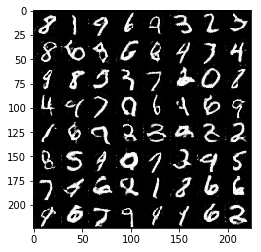

Epoch 2/2... Discriminator Loss: 1.3914... Generator Loss: 0.4199
Epoch 2/2... Discriminator Loss: 1.2912... Generator Loss: 0.5474
Epoch 2/2... Discriminator Loss: 1.1092... Generator Loss: 0.6376
Epoch 2/2... Discriminator Loss: 1.2261... Generator Loss: 0.5814
Epoch 2/2... Discriminator Loss: 0.9390... Generator Loss: 1.3516
Epoch 2/2... Discriminator Loss: 1.1937... Generator Loss: 0.7054
Epoch 2/2... Discriminator Loss: 1.5456... Generator Loss: 0.3415
Epoch 2/2... Discriminator Loss: 1.3042... Generator Loss: 0.6279
Epoch 2/2... Discriminator Loss: 1.1256... Generator Loss: 1.0741
Epoch 2/2... Discriminator Loss: 0.9653... Generator Loss: 0.8411
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


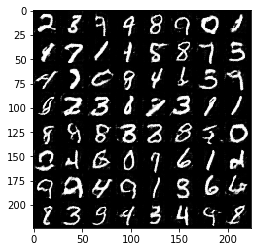

Epoch 2/2... Discriminator Loss: 0.8997... Generator Loss: 1.1891
Epoch 2/2... Discriminator Loss: 1.0504... Generator Loss: 0.7435
Epoch 2/2... Discriminator Loss: 0.9398... Generator Loss: 1.4309
Epoch 2/2... Discriminator Loss: 1.0479... Generator Loss: 0.8076
Epoch 2/2... Discriminator Loss: 1.1920... Generator Loss: 0.6536
Epoch 2/2... Discriminator Loss: 1.0473... Generator Loss: 0.8342
Epoch 2/2... Discriminator Loss: 1.2496... Generator Loss: 0.5834
Epoch 2/2... Discriminator Loss: 0.9547... Generator Loss: 1.7822
Epoch 2/2... Discriminator Loss: 0.9943... Generator Loss: 0.9641
Epoch 2/2... Discriminator Loss: 0.9879... Generator Loss: 0.7564
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


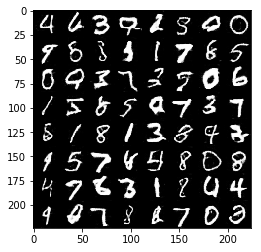

Epoch 2/2... Discriminator Loss: 1.2983... Generator Loss: 0.4381
Epoch 2/2... Discriminator Loss: 0.8714... Generator Loss: 1.6727
Epoch 2/2... Discriminator Loss: 1.2976... Generator Loss: 0.4484
Epoch 2/2... Discriminator Loss: 1.0416... Generator Loss: 1.8681
Epoch 2/2... Discriminator Loss: 0.8860... Generator Loss: 1.3797
Epoch 2/2... Discriminator Loss: 1.0592... Generator Loss: 1.2482
Epoch 2/2... Discriminator Loss: 1.8002... Generator Loss: 0.2453
Epoch 2/2... Discriminator Loss: 1.1224... Generator Loss: 0.6920
Epoch 2/2... Discriminator Loss: 1.1028... Generator Loss: 0.7120
Epoch 2/2... Discriminator Loss: 1.1811... Generator Loss: 0.5348
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 1)


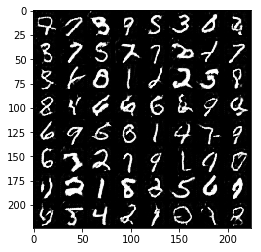

Epoch 2/2... Discriminator Loss: 1.0337... Generator Loss: 0.6788
Epoch 2/2... Discriminator Loss: 1.0959... Generator Loss: 0.6656
Epoch 2/2... Discriminator Loss: 1.0508... Generator Loss: 0.8163
Epoch 2/2... Discriminator Loss: 1.1019... Generator Loss: 0.7187
Epoch 2/2... Discriminator Loss: 1.1164... Generator Loss: 0.5449
Epoch 2/2... Discriminator Loss: 0.8455... Generator Loss: 1.3960
Epoch 2/2... Discriminator Loss: 1.4406... Generator Loss: 0.4050


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    losses_mnist = train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

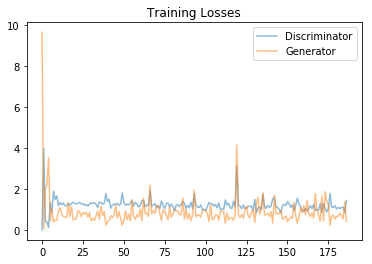

In [14]:
fig, ax = pyplot.subplots()
losses_mnist = np.array(losses_mnist)
pyplot.plot(losses_mnist.T[0], label='Discriminator', alpha=0.5)
pyplot.plot(losses_mnist.T[1], label='Generator', alpha=0.5)
pyplot.title("Training Losses")
pyplot.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)
X1: (?, 14, 14, 64)
X2: (?, 7, 7, 128)
X3: (?, 4, 4, 256)
Output: (?, 1)
X1: (?, 14, 14, 64)
X2: (?, 7, 7, 128)
X3: (?, 4, 4, 256)
Output: (?, 1)
Epoch 1/1... Discriminator Loss: 0.0390... Generator Loss: 4.0846
Epoch 1/1... Discriminator Loss: 0.1937... Generator Loss: 4.9004
Epoch 1/1... Discriminator Loss: 0.3467... Generator Loss: 2.7522
Epoch 1/1... Discriminator Loss: 1.4955... Generator Loss: 0.5769
Epoch 1/1... Discriminator Loss: 2.6671... Generator Loss: 0.1186
Epoch 1/1... Discriminator Loss: 1.8721... Generator Loss: 5.0538
Epoch 1/1... Discriminator Loss: 0.8938... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 0.1060... Generator Loss: 4.1491
Epoch 1/1... Discriminator Loss: 0.5225... Generator Loss: 4.4425
Epoch 1/1... Discriminator Loss: 0.9918... Generator Loss: 2.4980
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (

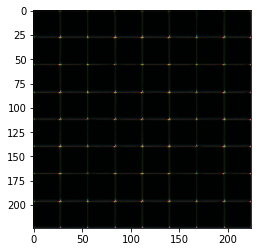

Epoch 1/1... Discriminator Loss: 1.9448... Generator Loss: 0.3804
Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.7072
Epoch 1/1... Discriminator Loss: 1.2302... Generator Loss: 0.9907
Epoch 1/1... Discriminator Loss: 1.5933... Generator Loss: 1.5272
Epoch 1/1... Discriminator Loss: 1.1563... Generator Loss: 2.8751
Epoch 1/1... Discriminator Loss: 1.0204... Generator Loss: 0.9464
Epoch 1/1... Discriminator Loss: 1.7648... Generator Loss: 0.2938
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 0.9810... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.5284
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


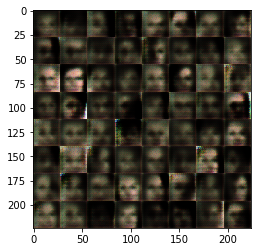

Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 0.5795
Epoch 1/1... Discriminator Loss: 1.5882... Generator Loss: 0.4518
Epoch 1/1... Discriminator Loss: 0.9405... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 1.4595... Generator Loss: 0.4945
Epoch 1/1... Discriminator Loss: 1.5275... Generator Loss: 1.6530
Epoch 1/1... Discriminator Loss: 1.1538... Generator Loss: 3.6211
Epoch 1/1... Discriminator Loss: 1.1012... Generator Loss: 1.1757
Epoch 1/1... Discriminator Loss: 1.2925... Generator Loss: 0.7192
Epoch 1/1... Discriminator Loss: 1.4375... Generator Loss: 0.5539
Epoch 1/1... Discriminator Loss: 0.9487... Generator Loss: 1.4216
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


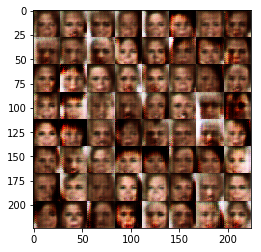

Epoch 1/1... Discriminator Loss: 0.9389... Generator Loss: 1.0625
Epoch 1/1... Discriminator Loss: 1.5185... Generator Loss: 0.3967
Epoch 1/1... Discriminator Loss: 1.8820... Generator Loss: 2.5617
Epoch 1/1... Discriminator Loss: 1.1014... Generator Loss: 0.5872
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.8205
Epoch 1/1... Discriminator Loss: 1.0628... Generator Loss: 0.7350
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 1.1494
Epoch 1/1... Discriminator Loss: 0.9197... Generator Loss: 1.0541
Epoch 1/1... Discriminator Loss: 0.9942... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 0.9693
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


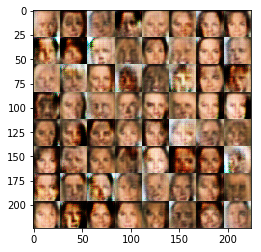

Epoch 1/1... Discriminator Loss: 0.8423... Generator Loss: 1.7200
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.4267
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 1.0588
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.5744
Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.5703
Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 0.9547
Epoch 1/1... Discriminator Loss: 1.3242... Generator Loss: 1.1557
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 0.5578
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.5166
Epoch 1/1... Discriminator Loss: 1.4466... Generator Loss: 0.5119
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


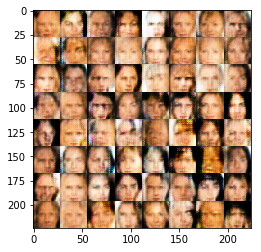

Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 1.0492
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.5657
Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.5197
Epoch 1/1... Discriminator Loss: 1.1776... Generator Loss: 0.8707
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 1.2396
Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.7613
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.5207
Epoch 1/1... Discriminator Loss: 1.1917... Generator Loss: 0.9285
Epoch 1/1... Discriminator Loss: 1.1482... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 1.4626... Generator Loss: 0.5546
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


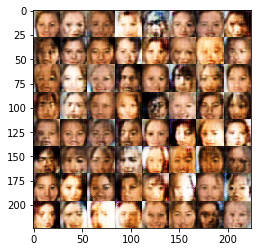

Epoch 1/1... Discriminator Loss: 1.6241... Generator Loss: 0.7918
Epoch 1/1... Discriminator Loss: 0.8793... Generator Loss: 1.6043
Epoch 1/1... Discriminator Loss: 1.1413... Generator Loss: 0.7038
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.5784
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.7353
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.4787
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.9211
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 0.9513
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


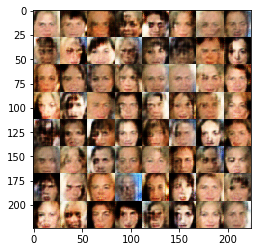

Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 1.2223... Generator Loss: 0.9991
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 1.3332... Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 1.1296... Generator Loss: 1.0559
Epoch 1/1... Discriminator Loss: 1.3630... Generator Loss: 0.5776
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.4396
Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 2.2631... Generator Loss: 0.1837
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


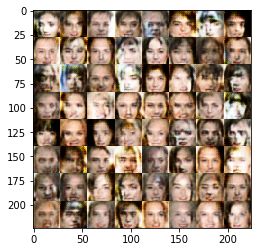

Epoch 1/1... Discriminator Loss: 1.0176... Generator Loss: 1.0435
Epoch 1/1... Discriminator Loss: 1.1860... Generator Loss: 0.6426
Epoch 1/1... Discriminator Loss: 1.3602... Generator Loss: 0.4801
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 1.3913
Epoch 1/1... Discriminator Loss: 1.4615... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.1534... Generator Loss: 0.7504
Epoch 1/1... Discriminator Loss: 1.2230... Generator Loss: 0.5626
Epoch 1/1... Discriminator Loss: 1.1580... Generator Loss: 0.8908
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.7029
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.3994
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


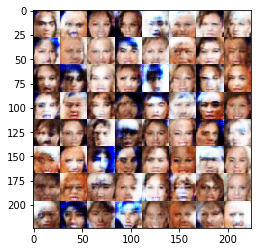

Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.6519
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 0.9694... Generator Loss: 0.8704
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 1.2901
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.7062
Epoch 1/1... Discriminator Loss: 1.1359... Generator Loss: 0.7880
Epoch 1/1... Discriminator Loss: 1.0275... Generator Loss: 1.1813
Epoch 1/1... Discriminator Loss: 1.2427... Generator Loss: 1.2279
Epoch 1/1... Discriminator Loss: 1.4456... Generator Loss: 0.4556
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


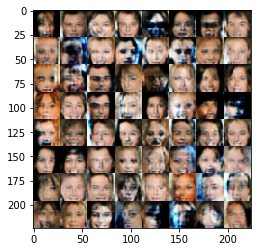

Epoch 1/1... Discriminator Loss: 1.2582... Generator Loss: 0.8414
Epoch 1/1... Discriminator Loss: 1.2096... Generator Loss: 0.7813
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.8518
Epoch 1/1... Discriminator Loss: 1.6259... Generator Loss: 0.3498
Epoch 1/1... Discriminator Loss: 1.4453... Generator Loss: 0.5613
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 0.8040
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 0.8463
Epoch 1/1... Discriminator Loss: 1.4388... Generator Loss: 0.9453
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.0921... Generator Loss: 1.4900
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


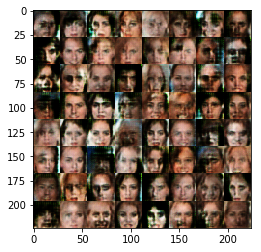

Epoch 1/1... Discriminator Loss: 1.1368... Generator Loss: 0.7716
Epoch 1/1... Discriminator Loss: 1.7010... Generator Loss: 0.5290
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.8123
Epoch 1/1... Discriminator Loss: 1.1638... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 1.6199... Generator Loss: 0.3529
Epoch 1/1... Discriminator Loss: 1.1551... Generator Loss: 0.6368
Epoch 1/1... Discriminator Loss: 1.3982... Generator Loss: 0.5604
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.9709
Epoch 1/1... Discriminator Loss: 1.4838... Generator Loss: 1.1208
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.7339
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


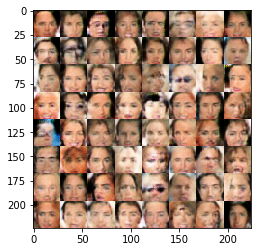

Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.7883
Epoch 1/1... Discriminator Loss: 1.5019... Generator Loss: 1.1050
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.5662
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 0.6999
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 0.7767
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.4842
Epoch 1/1... Discriminator Loss: 1.1190... Generator Loss: 0.9366
Epoch 1/1... Discriminator Loss: 1.1224... Generator Loss: 0.8519
Epoch 1/1... Discriminator Loss: 1.5397... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.3332... Generator Loss: 0.5763
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


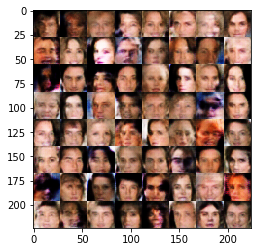

Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.6115
Epoch 1/1... Discriminator Loss: 1.6069... Generator Loss: 0.8962
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.5058
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.9826
Epoch 1/1... Discriminator Loss: 1.2839... Generator Loss: 0.8803
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.5236
Epoch 1/1... Discriminator Loss: 1.2160... Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.5937
Epoch 1/1... Discriminator Loss: 1.5124... Generator Loss: 0.4748
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


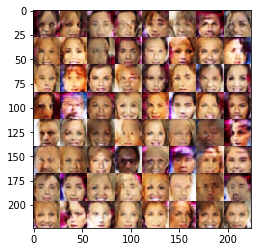

Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.5693
Epoch 1/1... Discriminator Loss: 1.2814... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.4179... Generator Loss: 0.7062
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 0.9964... Generator Loss: 1.0664
Epoch 1/1... Discriminator Loss: 1.2502... Generator Loss: 0.6386
Epoch 1/1... Discriminator Loss: 1.2502... Generator Loss: 1.0063
Epoch 1/1... Discriminator Loss: 1.5285... Generator Loss: 0.7309
Epoch 1/1... Discriminator Loss: 0.7719... Generator Loss: 1.4002
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


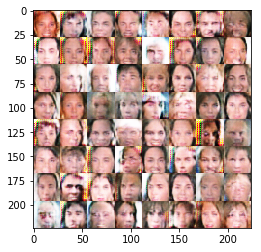

Epoch 1/1... Discriminator Loss: 1.2554... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 1.4445... Generator Loss: 0.6415
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.8631
Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 1.0581
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.4974
Epoch 1/1... Discriminator Loss: 1.6563... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.2077... Generator Loss: 0.7055
Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.5462
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.6136
Epoch 1/1... Discriminator Loss: 1.4998... Generator Loss: 0.6903
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


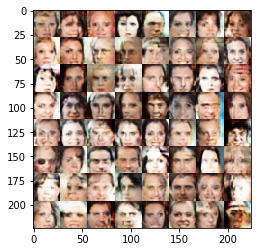

Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.5874
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.6121... Generator Loss: 0.3529
Epoch 1/1... Discriminator Loss: 1.6378... Generator Loss: 0.5578
Epoch 1/1... Discriminator Loss: 1.2188... Generator Loss: 0.9201
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.4767
Epoch 1/1... Discriminator Loss: 1.4513... Generator Loss: 0.7578
Epoch 1/1... Discriminator Loss: 1.2349... Generator Loss: 0.6007
Epoch 1/1... Discriminator Loss: 1.2587... Generator Loss: 0.6607
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.6917
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


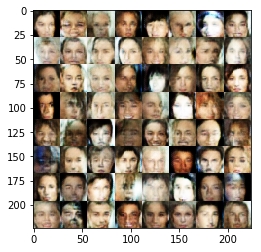

Epoch 1/1... Discriminator Loss: 1.4836... Generator Loss: 0.4638
Epoch 1/1... Discriminator Loss: 1.2103... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.5759
Epoch 1/1... Discriminator Loss: 1.4352... Generator Loss: 0.6331
Epoch 1/1... Discriminator Loss: 1.2560... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.4828
Epoch 1/1... Discriminator Loss: 1.4899... Generator Loss: 0.5382
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 0.5362
Epoch 1/1... Discriminator Loss: 1.1959... Generator Loss: 1.8553
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


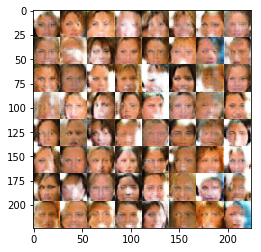

Epoch 1/1... Discriminator Loss: 0.5046... Generator Loss: 2.1646
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.8029
Epoch 1/1... Discriminator Loss: 1.0423... Generator Loss: 1.6578
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 0.5853
Epoch 1/1... Discriminator Loss: 1.5295... Generator Loss: 0.4520
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.4804
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.8981
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 1.4540
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 0.5170
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


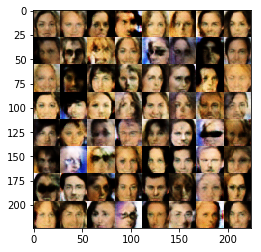

Epoch 1/1... Discriminator Loss: 1.2282... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.7028
Epoch 1/1... Discriminator Loss: 1.5393... Generator Loss: 1.0492
Epoch 1/1... Discriminator Loss: 1.1980... Generator Loss: 0.8718
Epoch 1/1... Discriminator Loss: 1.5649... Generator Loss: 0.5160
Epoch 1/1... Discriminator Loss: 1.3229... Generator Loss: 1.0823
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 0.6126
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


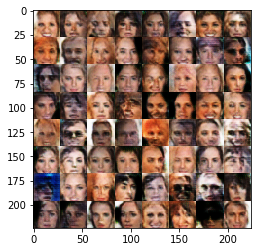

Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.6111
Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.3185... Generator Loss: 0.9464
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.6498
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.5451
Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.8675
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.8151
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.5816
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


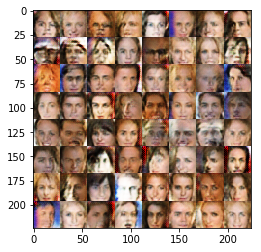

Epoch 1/1... Discriminator Loss: 1.6433... Generator Loss: 1.6832
Epoch 1/1... Discriminator Loss: 1.2584... Generator Loss: 0.5832
Epoch 1/1... Discriminator Loss: 1.2583... Generator Loss: 0.6895
Epoch 1/1... Discriminator Loss: 1.3088... Generator Loss: 0.5461
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.7633
Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.5440
Epoch 1/1... Discriminator Loss: 1.2015... Generator Loss: 0.8411
Epoch 1/1... Discriminator Loss: 1.5017... Generator Loss: 0.4331
Epoch 1/1... Discriminator Loss: 1.4348... Generator Loss: 0.5904
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


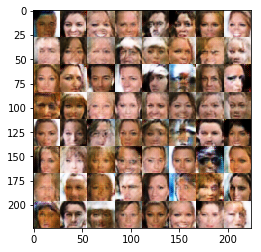

Epoch 1/1... Discriminator Loss: 1.4746... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 1.3166... Generator Loss: 0.9242
Epoch 1/1... Discriminator Loss: 1.3464... Generator Loss: 0.5558
Epoch 1/1... Discriminator Loss: 1.2068... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.4786
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.8416
Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.5496
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.6529
Epoch 1/1... Discriminator Loss: 1.4702... Generator Loss: 0.4607
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


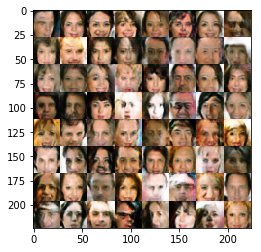

Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.7192
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.5436
Epoch 1/1... Discriminator Loss: 1.4911... Generator Loss: 0.3879
Epoch 1/1... Discriminator Loss: 1.2108... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.8406
Epoch 1/1... Discriminator Loss: 1.3301... Generator Loss: 0.5835
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.6343
Epoch 1/1... Discriminator Loss: 1.3011... Generator Loss: 0.5833
Epoch 1/1... Discriminator Loss: 1.4879... Generator Loss: 0.7171
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


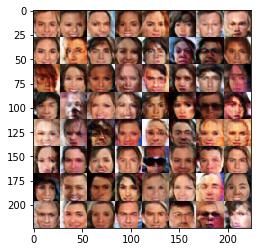

Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.1992... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.3449... Generator Loss: 0.5475
Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.7021
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.8059
Epoch 1/1... Discriminator Loss: 1.5360... Generator Loss: 0.4831
Epoch 1/1... Discriminator Loss: 1.2205... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 1.2956... Generator Loss: 0.9243
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


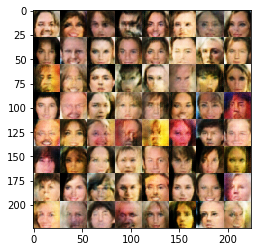

Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.6368
Epoch 1/1... Discriminator Loss: 1.2665... Generator Loss: 0.8133
Epoch 1/1... Discriminator Loss: 1.2210... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 0.6660
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.6996
Epoch 1/1... Discriminator Loss: 1.2155... Generator Loss: 0.8171
Epoch 1/1... Discriminator Loss: 1.6568... Generator Loss: 0.3706
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.5974
Epoch 1/1... Discriminator Loss: 1.3585... Generator Loss: 0.7881
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.6828
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


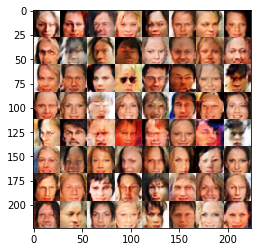

Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.5112... Generator Loss: 0.7427
Epoch 1/1... Discriminator Loss: 1.2714... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.5453
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.6378
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.6140
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.7560
Epoch 1/1... Discriminator Loss: 1.2956... Generator Loss: 0.7363
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


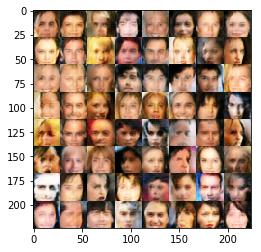

Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.6255
Epoch 1/1... Discriminator Loss: 1.4333... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.4471... Generator Loss: 0.4994
Epoch 1/1... Discriminator Loss: 1.2096... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.5649
Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.7675
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.6025
Epoch 1/1... Discriminator Loss: 1.2693... Generator Loss: 0.6639
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.5816
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


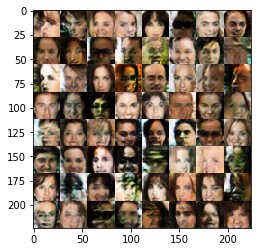

Epoch 1/1... Discriminator Loss: 1.5042... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.5853
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.6705
Epoch 1/1... Discriminator Loss: 1.4877... Generator Loss: 0.5110
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.3527... Generator Loss: 0.7078
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.5285
Epoch 1/1... Discriminator Loss: 1.3258... Generator Loss: 0.6552
Epoch 1/1... Discriminator Loss: 1.1765... Generator Loss: 0.6828
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.6129
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


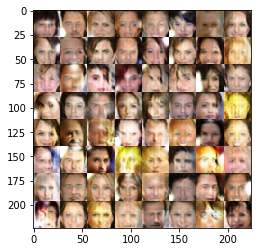

Epoch 1/1... Discriminator Loss: 1.1759... Generator Loss: 0.6956
Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 0.5683
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.9831
Epoch 1/1... Discriminator Loss: 1.5204... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.5393
Epoch 1/1... Discriminator Loss: 1.1782... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.8454
Epoch 1/1... Discriminator Loss: 1.3598... Generator Loss: 0.7397
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.5986
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


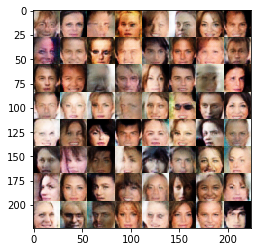

Epoch 1/1... Discriminator Loss: 1.4676... Generator Loss: 0.5406
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.6815
Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 0.7927
Epoch 1/1... Discriminator Loss: 1.2276... Generator Loss: 0.9002
Epoch 1/1... Discriminator Loss: 1.4398... Generator Loss: 0.4995
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.9107
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 0.5574
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.5119
Epoch 1/1... Discriminator Loss: 1.2810... Generator Loss: 0.7196
Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.4433
X0: (?, 7, 7, 512)
X1: (?, 14, 14, 256)
X2: (?, 28, 28, 128)
X3: (?, 28, 28, 64)
Output: (?, 28, 28, 3)


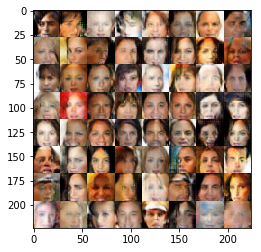

Epoch 1/1... Discriminator Loss: 1.3648... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.5612
Epoch 1/1... Discriminator Loss: 1.4901... Generator Loss: 0.6016
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.5816
Epoch 1/1... Discriminator Loss: 1.3919... Generator Loss: 0.5899
Epoch 1/1... Discriminator Loss: 1.4706... Generator Loss: 0.5121


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    losses_celeba = train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

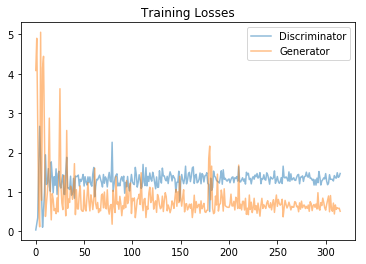

In [16]:
fig, ax = pyplot.subplots()
losses_celeba = np.array(losses_celeba)
pyplot.plot(losses_celeba.T[0], label='Discriminator', alpha=0.5)
pyplot.plot(losses_celeba.T[1], label='Generator', alpha=0.5)
pyplot.title("Training Losses")
pyplot.legend()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.